In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# image reading from file OPENCV(BGR) MATPLOTLIB(RGB)PILLOW(RGB)

In [20]:
img_ori=cv2.imread('lenna.jpg',1)
img_ori.shape

(500, 500, 3)

In [21]:
cv2.imshow('lenna_portray',img_ori)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

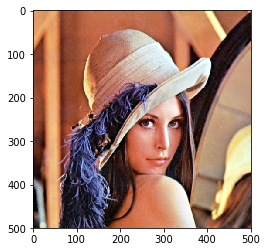

In [22]:
plt.imshow(cv2.cvtColor(img_ori,cv2.COLOR_BGR2RGB))
plt.show()


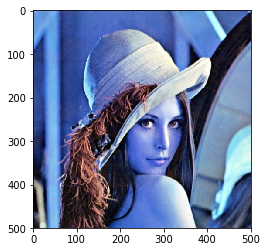

In [23]:
plt.imshow(img_ori,cmap='gray')
plt.show()

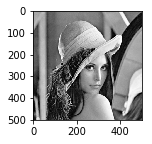

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(img_ori,cmap='gray')
plt.show()

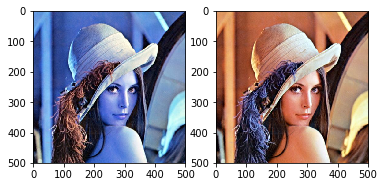

In [9]:
plt.subplot(121)
plt.imshow(img_ori)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_ori,cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
def my_show(img, size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

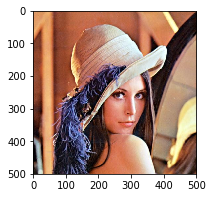

In [25]:
my_show(img_ori)

# image crop

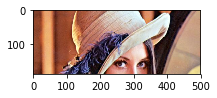

In [26]:
my_show(img_ori[90:300][10:200])

# channel split

In [12]:
B,G,R = cv2.split(img_ori)

In [27]:
cv2.imshow('B',B)
cv2.imshow('G',B)
cv2.imshow('R',B)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [30]:
def img_cooler(img,b_increace,r_decreace):
    B,G,R = cv2.split(img)
    b_lim = 255 - b_increace
    B[B>b_lim] = 255
    B[B<=b_lim] = (b_increace + B[B<=b_lim]).astype(img.dtype)
    
    r_lim = r_decreace
    R[R<r_lim] = 0
    R[R>=r_lim] = (R[R>=r_lim] - r_decreace).astype(img.dtype)
    return cv2.merge((B,G,R))

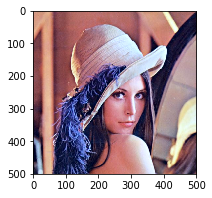

In [31]:
cooler_image = img_cooler(img_ori,30,10)
my_show(cooler_image)

# Gamma change

In [49]:
def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)
    table = np.array(table).astype('nt.')
    return cv2.LUT(img,table)

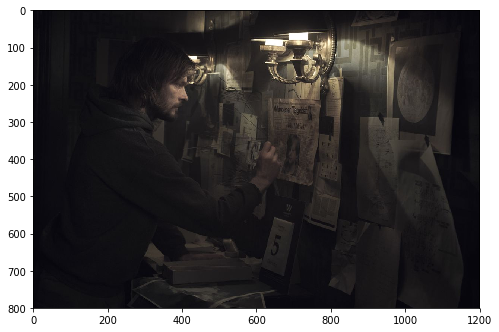

In [50]:
img_dark = cv2.imread('dark.jpg',1)
my_show(img_dark,size=(8,8))

In [51]:
img_brighter = adjust_gamma(img_dark,2)
my_show(img_brighter,size=(8,8))

TypeError: data type "nt." not understood

# #直方图均衡

NameError: name 'img_brighter' is not defined

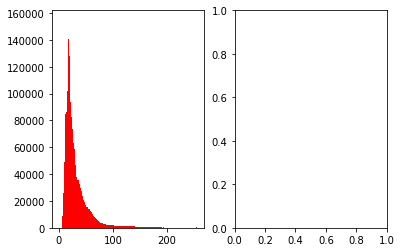

In [44]:
plt.subplot(121)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(122)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.show()

# 更好方案：YUV色彩空间的Y进行直方图均衡调亮图片

In [53]:
img_yuv = cv2.cvtColor(img_dark,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_better = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)

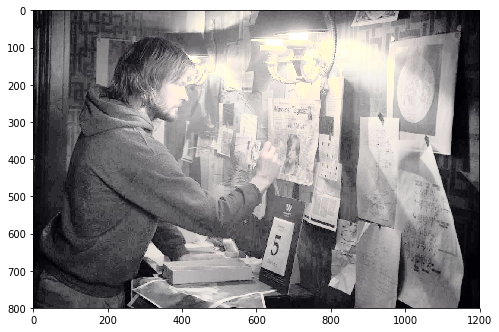

In [54]:
my_show(img_better,size=(8,8))

# 调亮度用YUV，调颜色用HSV（照片换底）

NameError: name 'img_brighter' is not defined

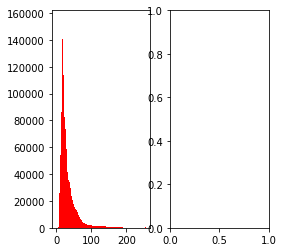

In [55]:
plt.subplot(131)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(132)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.subplot(133)
plt.hist(img_better.flatten(),256,[0,256],color='g')
plt.show()

# perspective transform

In [56]:
pts1 = np.float32([[0,0],[0,500],[500,0],[500,500]])
pts2 = np.float32([[0,30],[30,400],[400,9],[350,450]])
M = cv2.getPerspectiveTransform(pts1,pts2)
img_warp = cv2.warpPerspective(img_ori,M,(500,500))

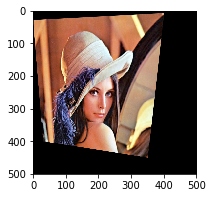

In [57]:
my_show(img_warp)

In [58]:
img_writing = cv2.imread('libai.png',0)

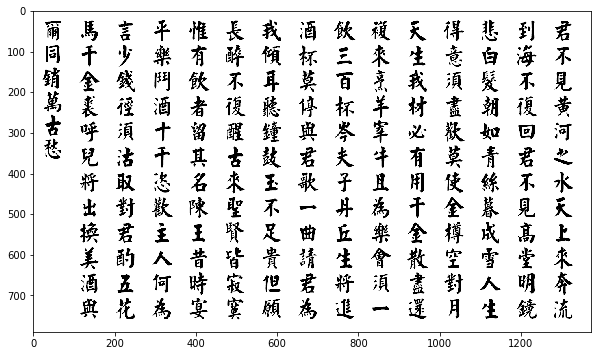

In [60]:
plt.figure(figsize=(10,8))
plt.imshow(img_writing,cmap='gray')
plt.show()

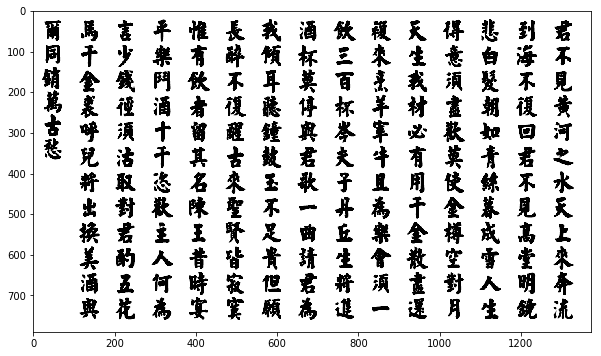

In [61]:
#白色腐蚀
erode_writing = cv2.erode(img_writing,None,iterations=1)
plt.figure(figsize=(10,8))
plt.imshow(erode_writing,cmap='gray')
plt.show()

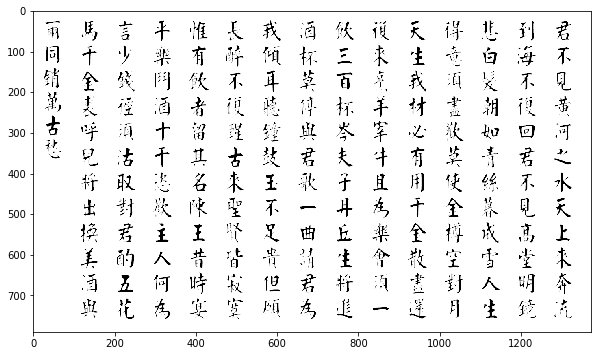

In [63]:
#白色膨胀
dilate_writing = cv2.dilate(img_writing,None,iterations=1)
plt.figure(figsize=(10,8))
plt.imshow(dilate_writing,cmap='gray')
plt.show()

In [ ]:
#先dilate后erode可以消灭黑点，反之可消灭白点